# Variance of the linear matter power spectrum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from compos import const, matterps
from MgIIabs import halomassfunc as hmf

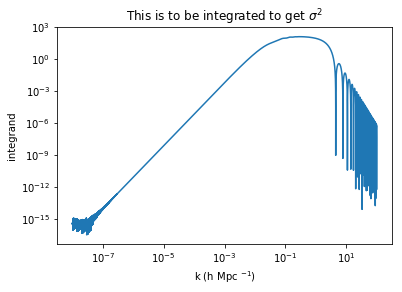

In [2]:
const.initializecosmo()
h = const.cosmo['h']

k = 10**np.linspace(-8,2,1000000)*h
R = 1/h

P = matterps.normalizedmp(k)
W = hmf.window_th(k,R)

integrand = k*k*W*W*P

plt.loglog(k/h,integrand)
plt.ylabel('integrand')
plt.xlabel('k (h Mpc $^{-1}$)')
plt.title('This is to be integrated to get $\sigma^2$')
plt.show()

In [3]:
help(quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        The ``user_data`` is the 

In [4]:
integrand = lambda x,R: (x*hmf.window_th(x,R))**2*matterps.normalizedmp(x)
variance = lambda R: quad(integrand,1e-7,100,args=(R,))
variance(8)

(23.01847917736064, 3.065493401331718e-07)

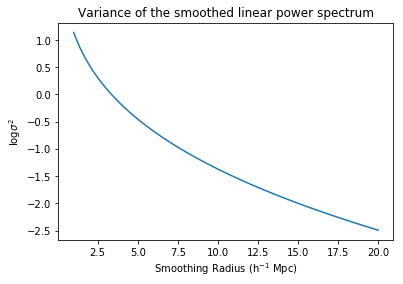

In [11]:
rad = np.linspace(1,20)/const.cosmo['h']
variance = np.asarray([hmf.psvariance(radius)[0] for radius in rad])

plt.plot(rad*const.cosmo['h'],np.log(variance))
plt.xlabel('Smoothing Radius (h$^{-1}$ Mpc)')
plt.ylabel('log$\sigma^2$')
plt.title('Variance of the smoothed linear power spectrum')
plt.show()

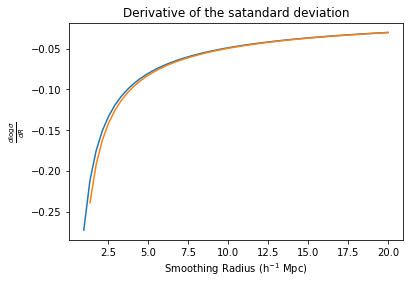

In [6]:
dlogvardR = np.asarray([hmf.dlogsigma_dr(radius) for radius in rad])
another = 0.5*np.diff(np.log(variance))/np.diff(rad)
plt.plot(rad*const.cosmo['h'],dlogvardR,rad[1:]*const.cosmo['h'],another)
plt.xlabel('Smoothing Radius (h$^{-1}$ Mpc)')
plt.ylabel(r'$\frac{d\log\sigma}{dR}$')
plt.title('Derivative of the satandard deviation')
plt.show()

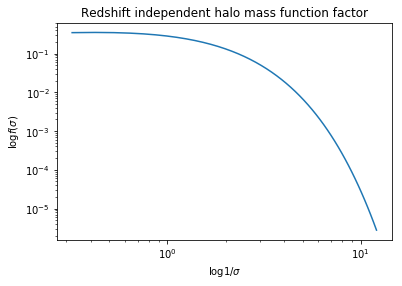

In [12]:
x = 1/variance
y = hmf.f_of_sigma(np.sqrt(variance))
plt.loglog(x,y)
plt.xlabel('log$1/\sigma$')
plt.ylabel(r'log$f(\sigma)$')
plt.title('Redshift independent halo mass function factor')
plt.show()